In [1]:
import os
import pickle
import numpy as np
import itertools as it

from types import SimpleNamespace
from scipy.optimize import minimize

import Modules.pauli as pauli
import Modules.Ham_MX2_11_band as H
import Modules.TB_parameters as TB
import Modules.functions as func
import Modules.plot_functions as pf

In [2]:
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

from IPython import display
from IPython.display import display_html
display_html(display.HTML(pf.nb_html_header))

Press this button to show/hide the code used in the notebook:

# Line cuts for $\Delta_G(E_x)$ at $k_y = 0$ and a fixed $\mu$

In [4]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'
out_name = 'topo_gap_meV_mus_Exs_Delta08meV_ky=0_check_gradient'
with open(path + out_name + '.p', 'rb') as fp:
    data_K = pickle.load(fp)
    mus = pickle.load(fp)
    Exs = pickle.load(fp)
    p = pickle.load(fp)
    fixed_ky = pickle.load(fp)
    
sqrts = np.sqrt(Exs**2 - p.Delta**2)

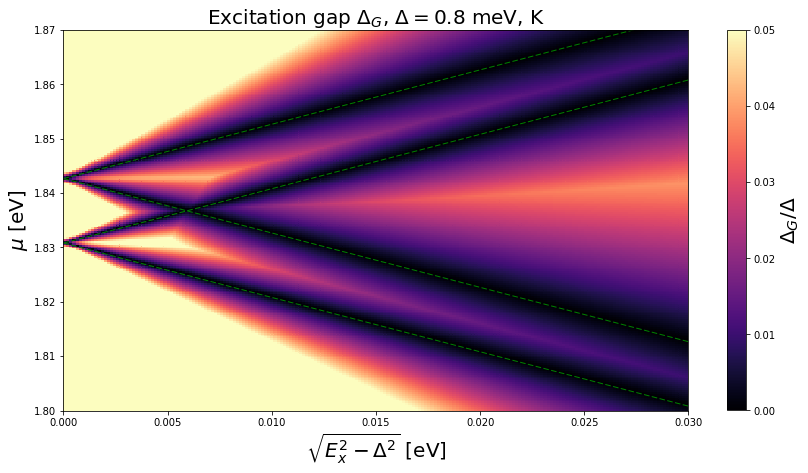

In [5]:
pf.plot_color_data(data_K, sqrts, mus, figsize=(14, 7), norm=p.Delta*1000, half_BZ=False, transpose=True,
                   title=r'Excitation gap $\Delta_G$, '+'$\Delta = $'+str(1000*p.Delta)+' meV, K',
                   xlabel=r'$\sqrt{E_x^2-\Delta^2}$ [eV]', ylabel=r'$\mu$ [eV]',
                   pcolor=True, cmap='magma', vmin=0, vmax=0.05, clabel=r'$\Delta_G/\Delta$')

# Boundaries, crossings with y axis
mu1 = 1.8308033364213507
mu2 = 1.8426584871296261
plt.plot(sqrts, sqrts + mu1, 'g--', lw=1)
plt.plot(sqrts, -sqrts + mu1, 'g--', lw=1)

plt.plot(sqrts, sqrts + mu2, 'g--', lw=1)
plt.plot(sqrts, -sqrts + mu2, 'g--', lw=1)
plt.ylim(mus[0], mus[-1]);

In [6]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'
out_name = 'topo_gap_meV_Exs_fixed_mus_Delta08meV_ky0'

with open(path + out_name + '.p', 'rb') as fp:
    d = pickle.load(fp)
    Exs = pickle.load(fp)
    keys = pickle.load(fp)
    mus = pickle.load(fp)
    p = pickle.load(fp)
sqrts = np.sqrt(Exs**2 - p.Delta**2)

Line cuts at $\mu \leq 1.81 \lesssim \mu_1$

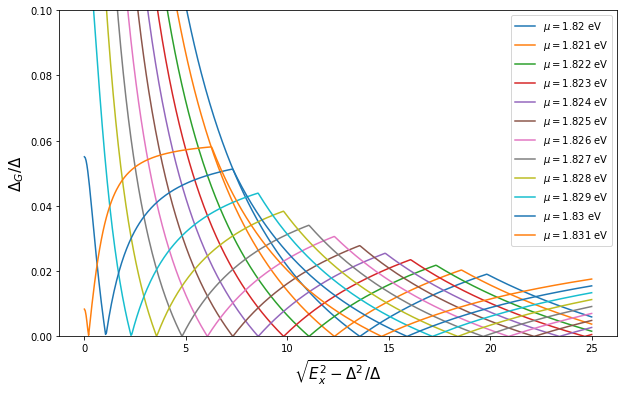

In [7]:
fig = plt.figure(figsize=(10, 6))
for key in keys[5:17]:
    plt.plot(sqrts/(p.Delta), np.array(d[key])/(p.Delta*1000), label=r'$\mu = $'+key+' eV')
plt.ylim(0.0, 0.1)
# plt.xlim(0, sqrts[-1]/p.Delta)
# plt.ylim(0, 0.02)
# plt.xlim(13, 16)
plt.xlabel(r'$\sqrt{E_x^2 - \Delta^2}/\Delta$', size=15)
plt.ylabel(r'$\Delta_G/\Delta$', size=15)
plt.legend()

At and above $\mu_1$

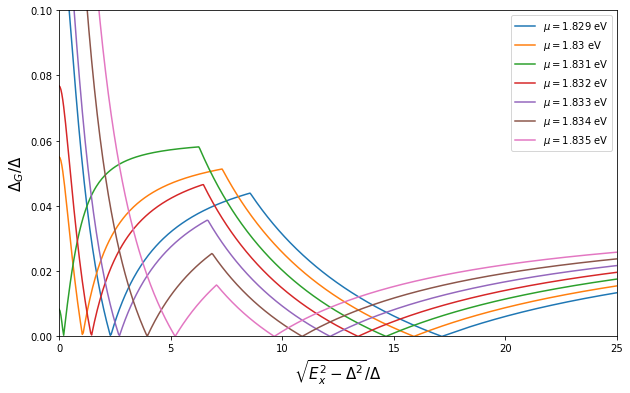

In [8]:
fig = plt.figure(figsize=(10, 6))
for key in keys[14:]:
    plt.plot(sqrts/(p.Delta), np.array(d[key])/(p.Delta*1000), label=r'$\mu = $'+key+' eV')
plt.ylim(0.0, 0.1)
plt.xlim(0, sqrts[-1]/p.Delta)
# plt.ylim(0, 0.02)
# plt.xlim(13, 16)
plt.xlabel(r'$\sqrt{E_x^2 - \Delta^2}/\Delta$', size=15)
plt.ylabel(r'$\Delta_G/\Delta$', size=15)
plt.legend()

First crossing is triv to topo transition, second topo to triv. 

## Closer look at $\mu = 1.831$ eV

In [9]:
p = SimpleNamespace(mu=1.831, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)

In [10]:
Delta = p.Delta
def toEx(sqrt):
    return np.sqrt(Delta**2*sqrt**2 + Delta**2)/Delta

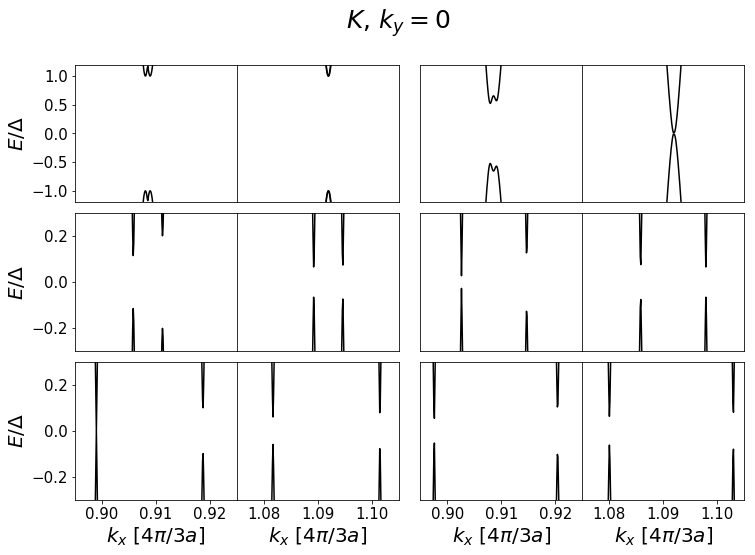

In [11]:
pf.topo_disp_Ex(p, K=1, suptitle=r'$K$, $k_y=0$', ylims=[(-1.2, 1.2), (-0.3, 0.3), (-0.3, 0.3)],
             Exs = [(0, toEx(0.1)), (toEx(4), toEx(9)), (toEx(14.7), toEx(17))],
             klimsL=(0.895, 0.925), klimsR=(1.075, 1.105), nKpoints=300, xticksL = [0.90, 0.91, 0.92],
             xticksR = [1.08, 1.09, 1.10], yticks=[(-1.0, -0.5, 0, 0.5, 1.0),
                                                   (-0.2, 0, 0.2), (-0.2, 0, 0.2)])

Sharp corners in $\Delta_G$ arise when the gap starts closing in the dispersion branch on the other side of the K (or -K point). The topological excitation gap is maximum when the gap is equal on both sides of the K point (centers of the topological bands in the color plot above)

# Line cuts for $\Delta_G(k_y)$ at fixed $\mu$ and $E_x$

In [3]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/'
out_name = 'topo_gap_meV_kys_Exs_Delta08meV_mu183_check_gradient'
with open(path + out_name + '.p', 'rb') as fp:
    data = pickle.load(fp)
    kys = pickle.load(fp)
    Exs = pickle.load(fp)
    p = pickle.load(fp)
sqrts = np.sqrt(Exs**2 - p.Delta**2)

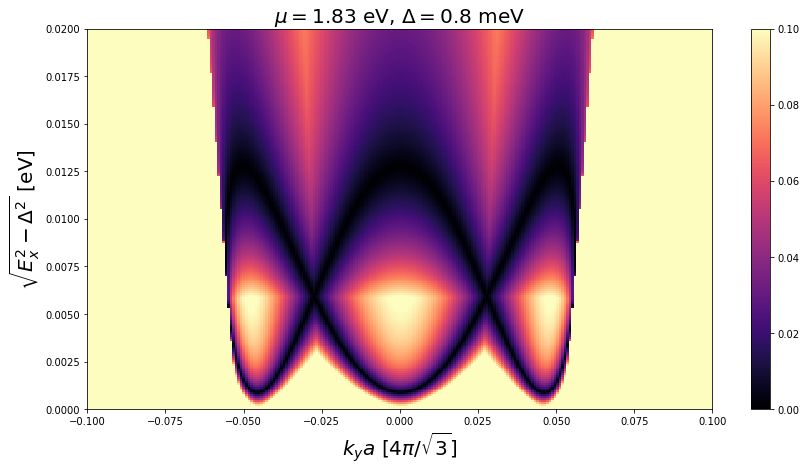

In [4]:
pf.plot_color_data(data, kys/(4*np.pi)*np.sqrt(3.), sqrts, ylabel=r'$\sqrt{E_x^2 - \Delta^2}$ [eV]',
                   title=r'$\mu = $'+str(p.mu)+' eV, $\Delta =$'+str(1000*p.Delta)+' meV', norm=p.Delta*1000,
                   xlabel=r'$k_ya$ [$4\pi/\sqrt{3}$]', pcolor=True, cmap='magma', vmin=0.0, vmax=0.1)

In [5]:
out_name = 'topo_gap_meV_kys_Exs_Delta08meV_mu183_check_gradient_higher_res'
with open(path + out_name + '.p', 'rb') as fp:
    data = pickle.load(fp)
    kys = pickle.load(fp)
    Exs = pickle.load(fp)
    p = pickle.load(fp)
sqrts = np.sqrt(Exs**2 - p.Delta**2)

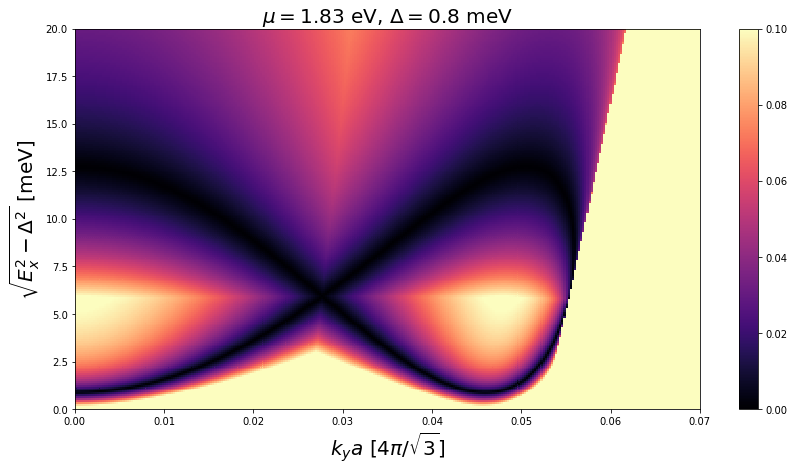

In [6]:
pf.plot_color_data(data, kys/(4*np.pi)*np.sqrt(3.), 1000*sqrts, ylabel=r'$\sqrt{E_x^2 - \Delta^2}$ [meV]',
                   title=r'$\mu = $'+str(p.mu)+' eV, $\Delta =$'+str(1000*p.Delta)+' meV', norm=p.Delta*1000,
                   xlabel=r'$k_ya$ [$4\pi/\sqrt{3}$]', pcolor=True, cmap='magma', vmin=0.0, vmax=0.1)

In [19]:
path = os.path.dirname(os.path.dirname(os.getcwd())) + '/data/11_band/line_cuts/'
out_name = 'topo_gap_meV_kys_fixed_Exs_Delta08meV_mu183'

with open(path + out_name + '.p', 'rb') as fp:
    d = pickle.load(fp)
    kys = pickle.load(fp)
    keys = pickle.load(fp)
    Exs = pickle.load(fp)
    p = pickle.load(fp)
sqrts = np.sqrt(Exs**2 - p.Delta**2)

In [20]:
fig = plt.figure(figsize=(10, 6))
for key, sqrt in zip(keys, sqrts):
    l = str(np.round(sqrt*1000, 4))
    plt.plot(kys/(4*np.pi/np.sqrt(3)), np.array(d[key])/(p.Delta*1000),
             label=r'$\sqrt{E_x^2 - \Delta^2} = $'+l+' meV')
plt.xlabel(r'$k_y$ [$4\pi/\sqrt{3}a$]', size=15)
plt.ylabel(r'$\Delta_G/\Delta$', size=15)
plt.xlim(kys[0]/(4*np.pi/np.sqrt(3)), kys[-1]/(4*np.pi/np.sqrt(3)))
plt.ylim(0., 0.1)
plt.legend(bbox_to_anchor=(1, 1), ncol=2)

The excitation gap is an even function of $k_y$

In [9]:
for key in keys:
    cneg = np.array(d[key])[:400]
    cpos = np.array(d[key])[400:]
    assert np.allclose(cneg[::-1], cpos)

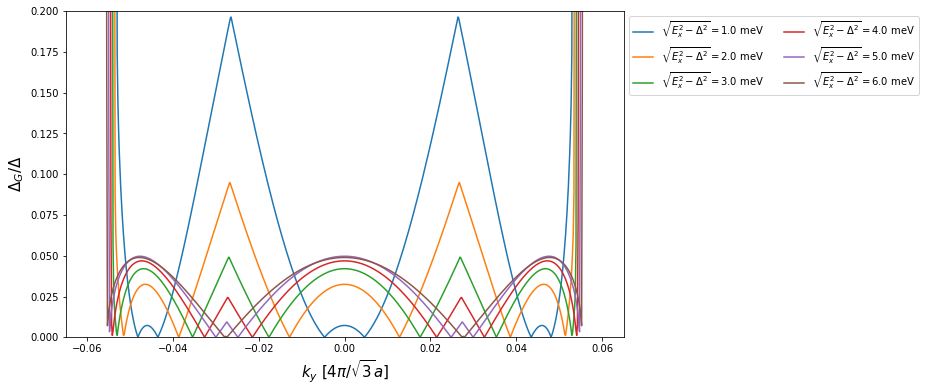

In [10]:
fig = plt.figure(figsize=(10, 6))
for key, sqrt in zip(keys[:6], sqrts[:6]):
    l = str(np.round(sqrt*1000, 4))
    plt.plot(kys/(4*np.pi/np.sqrt(3)), np.array(d[key])/(p.Delta*1000),
             label=r'$\sqrt{E_x^2 - \Delta^2} = $'+l+' meV')
plt.xlabel(r'$k_y$ [$4\pi/\sqrt{3}a$]', size=15)
plt.ylabel(r'$\Delta_G/\Delta$', size=15)
plt.xlim(kys[0]/(4*np.pi/np.sqrt(3)), kys[-1]/(4*np.pi/np.sqrt(3)))
plt.ylim(0, 0.2)
plt.legend(bbox_to_anchor=(1, 1), ncol=2)

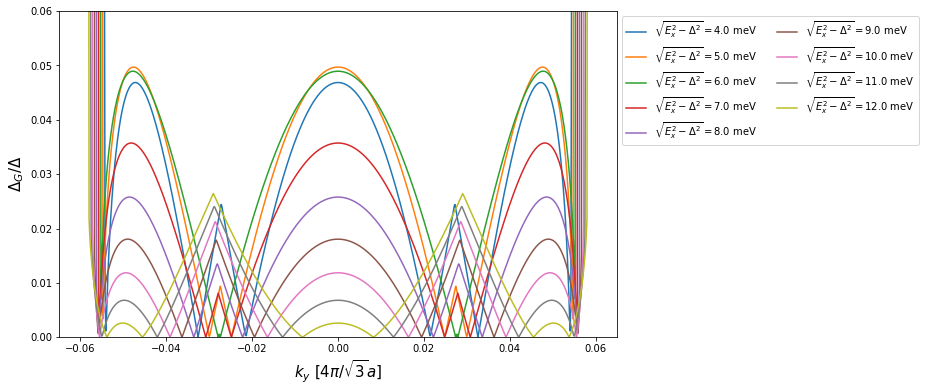

In [11]:
fig = plt.figure(figsize=(10, 6))
for key, sqrt in zip(keys[3:12], sqrts[3:12]):
    l = str(np.round(sqrt*1000, 4))
    plt.plot(kys/(4*np.pi/np.sqrt(3)), np.array(d[key])/(p.Delta*1000),
             label=r'$\sqrt{E_x^2 - \Delta^2} = $'+l+' meV')
plt.xlabel(r'$k_y$ [$4\pi/\sqrt{3}a$]', size=15)
plt.ylabel(r'$\Delta_G/\Delta$', size=15)
plt.xlim(kys[0]/(4*np.pi/np.sqrt(3)), kys[-1]/(4*np.pi/np.sqrt(3)))
plt.ylim(0, 0.06)
plt.legend(bbox_to_anchor=(1, 1), ncol=2)

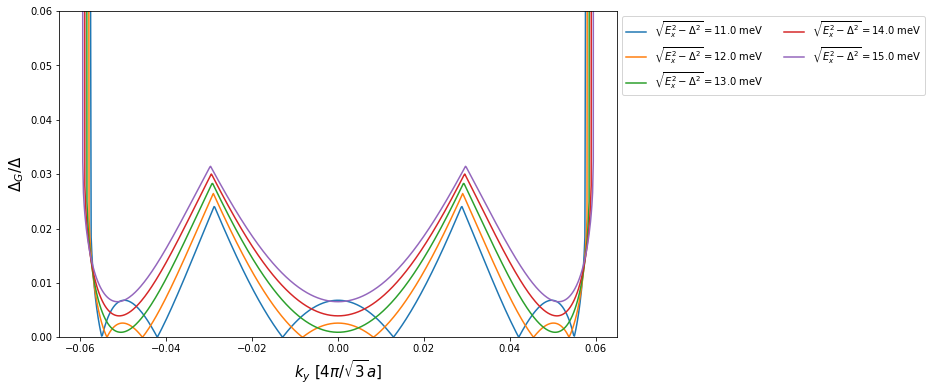

In [12]:
fig = plt.figure(figsize=(10, 6))
for key, sqrt in zip(keys[10:], sqrts[10:]):
    l = str(np.round(sqrt*1000, 4))
    plt.plot(kys/(4*np.pi/np.sqrt(3)), np.array(d[key])/(p.Delta*1000),
             label=r'$\sqrt{E_x^2 - \Delta^2} = $'+l+' meV')
plt.xlabel(r'$k_y$ [$4\pi/\sqrt{3}a$]', size=15)
plt.ylabel(r'$\Delta_G/\Delta$', size=15)
plt.xlim(kys[0]/(4*np.pi/np.sqrt(3)), kys[-1]/(4*np.pi/np.sqrt(3)))
plt.ylim(0, 0.06)
plt.legend(bbox_to_anchor=(1, 1), ncol=2)

## A look at gap closings with $\sqrt{Ex^2 - \Delta^2} = 4$ meV

In [22]:
p = SimpleNamespace(mu=1.83, Delta=0.8e-3, lambda_M=0.0836, lambda_X=0.0556, Ex=0.0, Ey=0.0)

In [25]:
sqrt = 4/1000
Ex = np.sqrt(sqrt**2 + p.Delta**2)
p.Ex = Ex

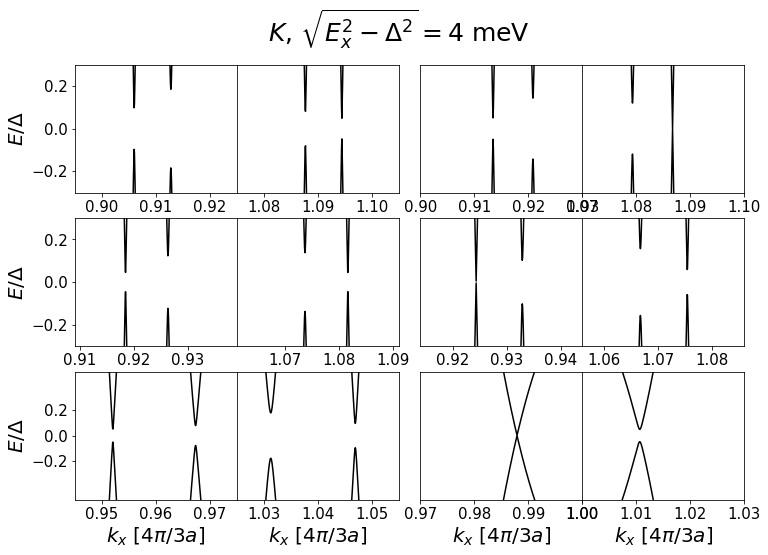

In [26]:
pf.topo_disp_ky(p, K=1, suptitle=r'$K$, $\sqrt{E_x^2 - \Delta^2} = 4$ meV', ylims=[(-0.3, 0.3), (-0.3, 0.3), (-0.5, 0.5)],
             yticks=[(-0.2, 0, 0.2), (-0.2, 0, 0.2), (-0.2, 0, 0.2)],
             kys = [(0.0, 0.0214), (0.0272, 0.0325), (0.047, 0.054)],
             klimsL=(0.895, 0.925), klimsR=(1.075, 1.105), nKpoints=500, xticksL = None,
             xticksR = None, wkx = 0.015,
             kx_centers = [(0.91, 0.915), (0.924, 0.929), (0.96, 0.985)])

In the final panel above (the gap closing at $k_ya \approx 0.054 * 4\pi/\sqrt{3} $), the higher spin-split conduction band has moved above the chemical potential, leaving only one band crossing it for which the gap closes in the figure. How the bands converge to $K$ as they move in energy above $\mu$ is shown below. This results in a large increase in $\Delta_G$, the near perpendicular lines at large $k_y$ in the line cuts above.

In [27]:
pf.topo_disp_ky(p, K=1, suptitle=r'$K$', ylims=[(-1.0, 1.0), (-1.0, 1.0), (-1.0, 1.0)],
             yticks=[(-0.8, -0.4, 0, 0.4, 0.8), (-0.8, -0.4, 0, 0.4, 0.8), (-0.8, -0.4, 0, 0.4, 0.8)],
             kys = [(0.049, 0.050), (0.0505, 0.051), (0.054, 0.0545)],
             klimsL=(0.895, 0.925), klimsR=(1.075, 1.105), nKpoints=500, xticksL = None,
             xticksR = None, wkx = 0.02,
             kx_centers = [(0.97, 0.98), (0.98, 0.98), (0.98, 0.98)])